## Determining Trade Union Status A Final Project
DSCI 508: MACHINE LEARNING
#### Janardan Devkota

### Import libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import preprocessing
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.simplefilter('ignore')

### Load data set

In [2]:
# Load the data set
data_capstone = pd.read_csv("/Volumes/JD/MSC-DS-MU/MU_DSCI 508 MACHINE LEARNING/Capstone Project DSCI-508/Janardan-set2--TRAIN.csv")
data_capstone.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,StateOfResidence,Connectivity,FeatureA,...,FeatureC,FeatureD,FeatureE,FeatureF,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Janardan-set2-1-19543,Female,0.0,No,No,24.0,Yes,IL,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.15,2494.65,No
1,Janardan-set2-2-15983,Female,0.0,No,No,36.0,Yes,IL,DSL,Yes,...,No,No,No,No,One year,No,Mailed check,54.45,1893.5,No
2,Janardan-set2-3-16650,Female,1.0,No,No,71.0,Yes,IL,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,105.90,7521.95,No
3,Janardan-set2-4-17130,Male,0.0,No,No,26.0,Yes,MO,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.75,2146.5,No
4,Janardan-set2-5-13938,Female,1.0,No,No,8.0,Yes,MO,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,87.10,713.6,No


### Data Cleaning 

In [3]:
# Check the data type
data_capstone. 

ID                   object
gender               object
Management          float64
USAcitizen           object
Married              object
MonthsInUnion       float64
ContinuingEd         object
StateOfResidence     object
Connectivity         object
FeatureA             object
FeatureB             object
FeatureC             object
FeatureD             object
FeatureE             object
FeatureF             object
DuesFrequency        object
PaperlessBilling     object
PaymentMethod        object
MonthlyDues         float64
TotalDues            object
LeftUnion            object
dtype: object

In [4]:
# Convert the Management to string and TotalDues into float
data_capstone['TotalDues'] = pd.to_numeric(data_capstone['TotalDues'], errors = 'coerce')
data_capstone['Management'] = data_capstone['Management'].astype(str)

In [5]:
# Review sample statistics and chack the values 
data_capstone.describe(include = ['O'])

,ID,gender,Management,USAcitizen,Married,ContinuingEd,StateOfResidence,Connectivity,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,FeatureF,DuesFrequency,PaperlessBilling,PaymentMethod,LeftUnion
count,3000,3000,3000,2996,2996,2998,2999,2996,2996,2998,2997,2998,2997,2998,2998,2997,2996,3000
unique,3000,2,3,2,2,2,2,3,3,3,3,3,3,3,3,2,4,2
top,Janardan-set2-1-19543,Male,0.0,No,No,Yes,MO,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,1505,2492,1561,2121,2705,1745,1354,1511,1329,1340,1521,1228,1219,1704,1767,1029,2175


In [6]:
# Update the management columns values 
data_capstone.loc[data_capstone['Management'] == '1.0','Management'] = 'Yes'
data_capstone.loc[data_capstone['Management'] == '0.0','Management'] = 'No'
data_capstone.loc[data_capstone['Management'] == 'nan','Management'] = 'No'

array([[<AxesSubplot:title={'center':'MonthsInUnion'}>,
        <AxesSubplot:title={'center':'MonthlyDues'}>],
       [<AxesSubplot:title={'center':'TotalDues'}>, <AxesSubplot:>]],
      dtype=object)

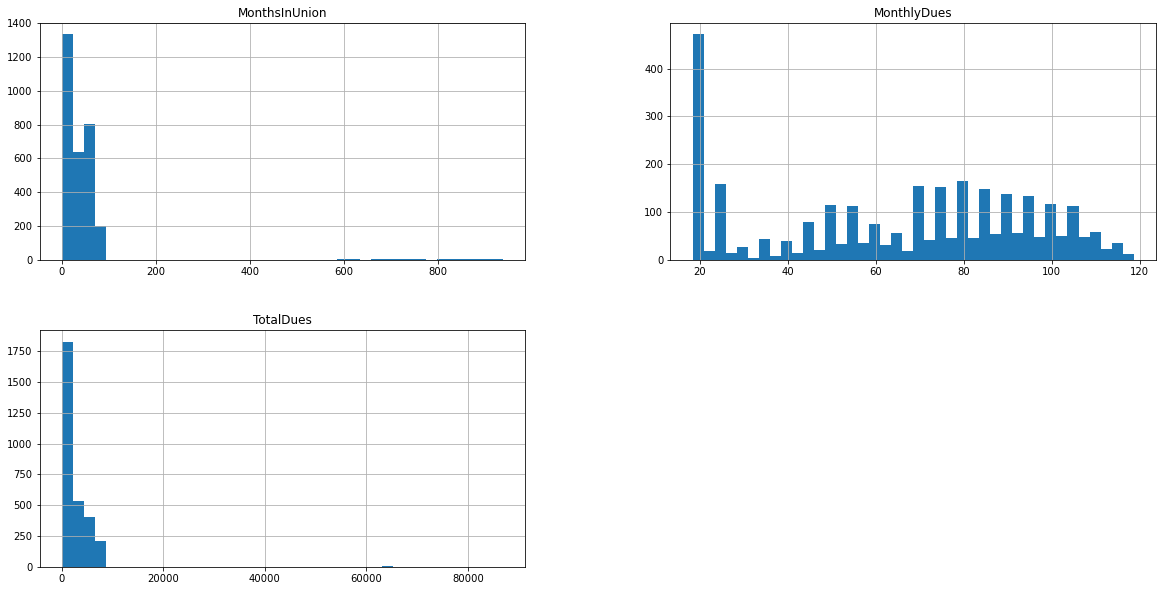

In [7]:
# Check the outliers and correct them
data_capstone.hist(bins = 40, figsize = [20,10])

In [8]:
# Update outliers in the of MonthsInUnion to the mean value where < 600
data_capstone.loc[data_capstone['MonthsInUnion'] > 600, 'MonthsInUnion'] = round(data_capstone.loc[(data_capstone.loc[:,'MonthsInUnion'] < 600),('MonthsInUnion')].mean(),0)

# Update outliers in the of TotalDues to the mean value where <= 14000
data_capstone.loc[(data_capstone['TotalDues'] > 14000)|(data_capstone['TotalDues'] == 0), 'TotalDues'] = round(data_capstone.loc[(data_capstone.loc[:,'TotalDues'] <= 14000) & (data_capstone.loc[:,'TotalDues'] > 0), ('TotalDues')].mean(),2)


<AxesSubplot:ylabel='Frequency'>

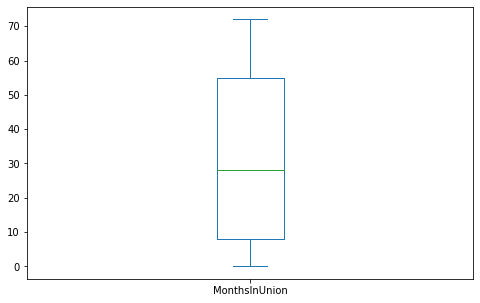

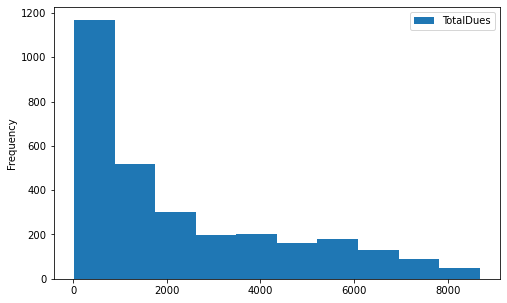

In [9]:
# Check the outliers of MonthsInUnion using box plot 
data_capstone[['ID', 'MonthsInUnion']].plot(kind = 'box', x ='ID', y = 'MonthsInUnion', figsize = [8,5])

# Check the outliers of TotalDues using histogram
data_capstone[['ID', 'TotalDues']].plot(kind = 'hist', x ='ID', y = 'TotalDues', figsize = [8,5])

In [10]:
# Check for null values
features_with_na = [features for features in data_capstone.columns if data_capstone[features].isnull().sum() > 1]
for feature in features_with_na:
    print(feature, np.round(data_capstone[feature].isnull().mean(), 4), ' % missing values')

USAcitizen 0.0013  % missing values
Married 0.0013  % missing values
MonthsInUnion 0.0007  % missing values
ContinuingEd 0.0007  % missing values
Connectivity 0.0013  % missing values
FeatureA 0.0013  % missing values
FeatureB 0.0007  % missing values
FeatureC 0.001  % missing values
FeatureD 0.0007  % missing values
FeatureE 0.001  % missing values
FeatureF 0.0007  % missing values
DuesFrequency 0.0007  % missing values
PaperlessBilling 0.001  % missing values
PaymentMethod 0.0013  % missing values
MonthlyDues 0.0017  % missing values
TotalDues 0.0023  % missing values


In [11]:
# Updates the NA values
data_capstone['gender'] = data_capstone['gender'].replace(np.nan,'Male')
data_capstone['Management'] = data_capstone['Management'].replace(np.nan,'No')
data_capstone['USAcitizen'] = data_capstone['USAcitizen'].replace(np.nan,'No')
data_capstone['Married'] = data_capstone['Married'].replace(np.nan,'No')
data_capstone['MonthsInUnion'] = data_capstone['MonthsInUnion'].replace(np.nan, round(data_capstone['MonthsInUnion'].mean(), 0))
data_capstone['ContinuingEd'] = data_capstone['ContinuingEd'].replace(np.nan,'Yes')
data_capstone['StateOfResidence'] = data_capstone['StateOfResidence'].replace(np.nan,'No')                                                                        
data_capstone['Connectivity'] = data_capstone['Connectivity'].replace(np.nan,'No')
data_capstone['FeatureA'] = data_capstone['FeatureA'].replace(np.nan,'No')
data_capstone['FeatureB'] = data_capstone['FeatureB'].replace(np.nan,'No')
data_capstone['FeatureC'] = data_capstone['FeatureC'].replace(np.nan,'No')
data_capstone['FeatureD'] = data_capstone['FeatureD'].replace(np.nan,'No')
data_capstone['FeatureE'] = data_capstone['FeatureE'].replace(np.nan,'No')
data_capstone['FeatureF'] = data_capstone['FeatureF'].replace(np.nan,'No')
data_capstone['DuesFrequency'] = data_capstone['DuesFrequency'].replace(np.nan,'Month-to-month')
data_capstone['PaperlessBilling'] = data_capstone['PaperlessBilling'].replace(np.nan,'Yes')
data_capstone['PaymentMethod'] = data_capstone['PaymentMethod'].replace(np.nan,'Electronic check')
data_capstone['MonthlyDues'] = data_capstone['MonthlyDues'].replace(np.nan, round(data_capstone['MonthlyDues'].mean(), 2))
data_capstone['TotalDues'] = data_capstone['TotalDues'].replace(np.nan, round(data_capstone['TotalDues'].mean(), 0))

# Recheck for null values after null values updates 
data_capstone.isna().sum()

ID                  0
gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
StateOfResidence    0
Connectivity        0
FeatureA            0
FeatureB            0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

In [12]:
# Checking for any fields out of place
for col in data_capstone:
    print(data_capstone[col].unique())

['Janardan-set2-1-19543' 'Janardan-set2-2-15983' 'Janardan-set2-3-16650'
 ... 'Janardan-set2-2998-13977' 'Janardan-set2-2999-16832'
 'Janardan-set2-3000-16620']
['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
[24. 36. 71. 26.  8. 30. 17.  3.  2.  6. 18.  1. 54. 53. 39. 55. 56. 20.
  9.  4. 68. 33. 46. 37. 67. 12. 32. 58. 13. 29. 44. 48. 14. 10. 65. 15.
 42. 52. 16. 66. 64. 72. 19. 51. 43. 28. 50. 23. 57. 70. 63. 22.  5. 60.
 25. 31. 41. 40. 59. 61. 34. 49. 21. 62. 47. 11. 38. 69.  7. 27. 35. 45.
  0.]
['Yes' 'No']
['IL' 'MO' 'No']
['Fiber optic' 'DSL' 'No']
['No' 'Yes' 'Maryville']
['Yes' 'No' 'Maryville']
['Yes' 'No' 'Maryville']
['No' 'Yes' 'Maryville']
['Yes' 'No' 'Maryville']
['Yes' 'No' 'Maryville']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[104.15  54.45 105.9  ...  79.05  30.15 111.6 ]
[2494.65 1893.5  7521.95 ... 2149.05  254.5  6033.1 ]
['No' 'Yes']


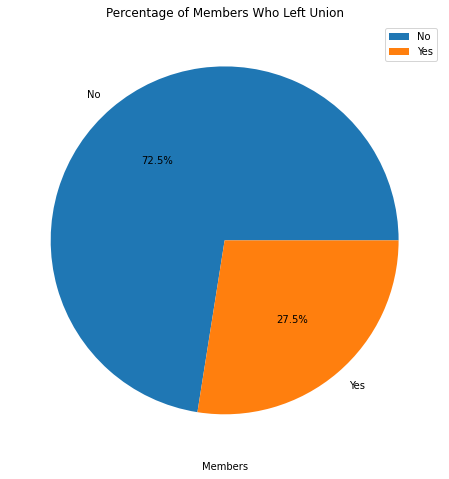

In [13]:
# Check how many members left the union 
plt.figure(figsize = [10,8])

x = data_capstone['LeftUnion'].value_counts().index
y = data_capstone['LeftUnion'].value_counts().values.tolist()
plt.pie(y, labels = x, autopct='%1.1f%%')
plt.xlabel('Members')
plt.title('Percentage of Members Who Left Union')
plt.legend(bbox_to_anchor=(1, 1))
plt.show() 

In [14]:
# Encode the categorical variables
data_capstone_encode = pd.get_dummies(data_capstone,
                                      columns = ['gender','Management','USAcitizen','Married',
                                                 'ContinuingEd','StateOfResidence','Connectivity',
                                                'FeatureA','FeatureB','FeatureC','FeatureD','FeatureE',
                                                 'FeatureF','DuesFrequency','PaperlessBilling',
                                                'PaymentMethod','LeftUnion'])

In [15]:
# Drop the column 'ID', it's not useful in analysis
data_capstone_encode = data_capstone_encode.drop(['ID'], axis = 1)
data_capstone_encode.head(3)

,MonthsInUnion,MonthlyDues,TotalDues,gender_Female,gender_Male,Management_No,Management_Yes,USAcitizen_No,USAcitizen_Yes,Married_No,...,DuesFrequency_One year,DuesFrequency_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,LeftUnion_No,LeftUnion_Yes
0,24.0,104.15,2494.65,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,36.0,54.45,1893.50,1,0,1,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,71.0,105.90,7521.95,1,0,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0


### Normalize the data

In [16]:
# Float features are normalize 
data_capstone_encode['MonthlyDues'] = (data_capstone_encode['MonthlyDues'] - data_capstone_encode['MonthsInUnion'].min()) / (data_capstone_encode['MonthlyDues'].max() - data_capstone_encode['MonthlyDues'].min())
data_capstone_encode['TotalDues'] = (data_capstone_encode['TotalDues'] - data_capstone_encode['TotalDues'].min())/(data_capstone_encode['TotalDues'].max() - data_capstone_encode['TotalDues'].min())
data_capstone_encode['MonthsInUnion'] = (data_capstone_encode['MonthsInUnion'] - data_capstone_encode['MonthsInUnion'].min())/(data_capstone_encode['MonthsInUnion'].max() - data_capstone_encode['MonthsInUnion'].min())

data_capstone_encode.head(10).T

,0,1,2,3,4,5,6,7,8,9
MonthsInUnion,0.333333,0.500000,0.986111,0.361111,0.111111,0.416667,0.333333,0.236111,0.041667,0.027778
MonthlyDues,1.039421,0.543413,1.056886,0.855788,0.869261,1.072854,0.241517,0.513972,0.211577,0.607285
TotalDues,0.285676,0.216306,0.865811,0.245501,0.080149,0.371976,0.068084,0.101717,0.003808,0.010657
gender_Female,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
gender_Male,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
Management_No,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Management_Yes,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
USAcitizen_No,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
USAcitizen_Yes,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
Married_No,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000


#### Run PCA on data set and show components

Components wanted = 47
['component0', 'component1', 'component2', 'component3', 'component4', 'component5', 'component6', 'component7', 'component8', 'component9', 'component10', 'component11', 'component12', 'component13', 'component14', 'component15', 'component16', 'component17', 'component18', 'component19', 'component20', 'component21', 'component22', 'component23', 'component24', 'component25', 'component26', 'component27', 'component28', 'component29', 'component30', 'component31', 'component32', 'component33', 'component34', 'component35', 'component36', 'component37', 'component38', 'component39', 'component40', 'component41', 'component42', 'component43', 'component44', 'component45', 'component46']


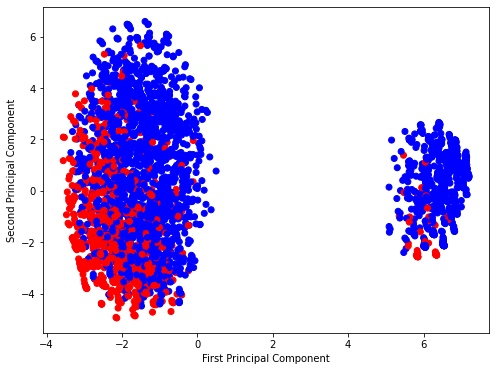

In [17]:
dependentVariable = 'LeftUnion_Yes'
df_outcome = data_capstone_encode[dependentVariable]
df_input = data_capstone_encode.loc[:,(data_capstone_encode.columns != dependentVariable) & (data_capstone_encode.columns != 'ID')]
componentsWanted = len(df_input.columns)
print(f'Components wanted = {componentsWanted}')
componentList = ['component' + str(n) for n in range(componentsWanted)]
print([componentList[i]for i in range(len(componentList))])
scaler = StandardScaler()
scaler.fit(df_input)
scaled_data = scaler.transform(df_input)
pca = PCA(n_components = componentsWanted)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = data_capstone_encode[dependentVariable], cmap = plt.cm.bwr)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [18]:
# Show the components with the most influence
df_comp = pd.DataFrame(pca.components_, columns = df_input.columns, index = list(componentList))
componentsT = df_comp.sort_values(by = componentList, axis = 1, ascending = False).round(decimals = 4).T
components = componentsT.reindex(componentsT.component0.abs().sort_values(ascending = False).index)
components


,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,...,component37,component38,component39,component40,component41,component42,component43,component44,component45,component46
FeatureD_Maryville,0.2900,-0.0060,-0.0974,-0.0128,0.0307,0.0029,0.0308,-0.0280,0.0022,-0.0165,...,-0.0286,-0.2749,0.0719,0.2097,-0.0705,-0.0214,-0.6845,0.0590,0.2209,-0.0328
FeatureC_Maryville,0.2900,-0.0060,-0.0974,-0.0128,0.0307,0.0029,0.0308,-0.0280,0.0022,-0.0165,...,-0.0530,-0.2929,0.1170,0.1122,0.1009,0.1622,0.6676,0.0991,0.0048,0.1841
FeatureB_Maryville,0.2900,-0.0060,-0.0974,-0.0128,0.0307,0.0029,0.0308,-0.0280,0.0022,-0.0165,...,-0.2324,0.3434,-0.0603,-0.0583,0.0371,-0.0586,0.0234,0.0919,-0.1019,-0.2085
FeatureF_Maryville,0.2898,-0.0060,-0.0972,-0.0124,0.0316,0.0035,0.0306,-0.0282,0.0023,-0.0153,...,-0.3077,-0.0968,-0.2168,-0.1601,-0.1784,0.0811,-0.0058,0.0184,-0.0910,-0.0568
FeatureE_Maryville,0.2898,-0.0059,-0.0975,-0.0128,0.0310,0.0024,0.0305,-0.0283,0.0025,-0.0177,...,0.0499,-0.0496,-0.1298,0.1543,0.0296,0.2691,-0.0179,-0.0010,-0.0117,-0.0741
FeatureA_Maryville,0.2896,-0.0055,-0.0973,-0.0131,0.0303,0.0029,0.0313,-0.0291,0.0033,-0.0166,...,-0.0405,0.0111,-0.0080,-0.0245,-0.0035,-0.0094,0.0026,0.0475,0.0160,-0.0184
Connectivity_No,0.2893,-0.0062,-0.0979,-0.0135,0.0317,0.0034,0.0299,-0.0271,0.0024,-0.0155,...,-0.0380,0.1756,0.0731,0.1946,0.0907,0.0472,0.0007,0.0599,-0.2093,-0.2581
MonthlyDues,-0.2442,0.1429,-0.1681,0.0028,-0.0578,0.0028,-0.1349,0.0494,-0.0261,0.0798,...,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000
Connectivity_Fiber optic,-0.1742,0.0102,-0.2909,0.0788,-0.0498,0.0062,-0.0777,0.0348,-0.0429,0.1064,...,-0.0464,0.2145,0.0892,0.2378,0.1109,0.0576,0.0009,0.0732,-0.2557,-0.3153
FeatureA_No,-0.1685,-0.1497,-0.0959,0.0630,0.1593,-0.0053,-0.0272,0.0685,-0.1541,-0.1244,...,-0.0498,0.0137,-0.0098,-0.0301,-0.0043,-0.0116,0.0032,0.0585,0.0197,-0.0227


In [19]:
# The total varaiance is explained 
sum(pca.explained_variance_ratio_)

1.0

In [20]:
# The first 19 components explains 94% of the variance
cumVar = 0
for c in range(componentsWanted):
    var = pca.explained_variance_ratio_[c]
    cumVar += var
    print(f'component{c:02} explains{100*var:.2f}% fro a cumulative total of {100*cumVar:.2f}%')   

component00 explains24.08% fro a cumulative total of 24.08%
component01 explains13.12% fro a cumulative total of 37.20%
component02 explains8.82% fro a cumulative total of 46.02%
component03 explains5.36% fro a cumulative total of 51.37%
component04 explains4.40% fro a cumulative total of 55.77%
component05 explains4.28% fro a cumulative total of 60.05%
component06 explains4.02% fro a cumulative total of 64.07%
component07 explains3.45% fro a cumulative total of 67.52%
component08 explains2.97% fro a cumulative total of 70.49%
component09 explains2.89% fro a cumulative total of 73.38%
component10 explains2.69% fro a cumulative total of 76.07%
component11 explains2.63% fro a cumulative total of 78.71%
component12 explains2.51% fro a cumulative total of 81.22%
component13 explains2.41% fro a cumulative total of 83.63%
component14 explains2.32% fro a cumulative total of 85.95%
component15 explains2.16% fro a cumulative total of 88.10%
component16 explains2.05% fro a cumulative total of 90

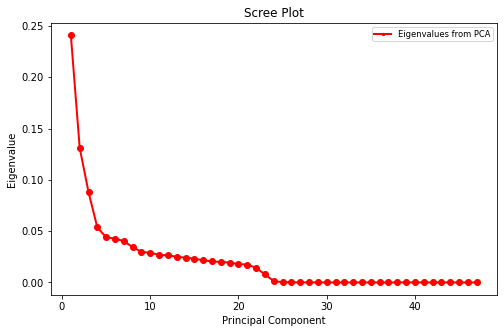

In [21]:
fig = plt.figure(figsize = (8,5))
plt.plot(np.arange(componentsWanted) + 1, pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc = 'best', borderpad = 0.3, markerscale = 0.4,shadow = False, prop = matplotlib.font_manager.FontProperties(size = 'small'))
plt.show()


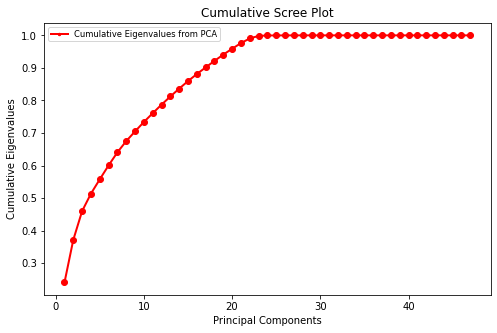

In [22]:
# Cumulative Scree plot

cumEigens=[]
cum = 0
for e in pca.explained_variance_ratio_:
    cum += e
    cumEigens.append(cum)

fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(componentsWanted) + 1, cumEigens, 'ro-', linewidth = 2)
plt.title('Cumulative Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Eigenvalues')
leg = plt.legend(['Cumulative Eigenvalues from PCA'], loc = 'best', borderpad = 0.3, markerscale = 0.4,
               shadow = False, prop = matplotlib.font_manager.FontProperties(size = 'small'))
plt.show()


### Write PCA array to a dataframe

In [23]:
x_pca = pd.DataFrame(x_pca)

### Create csv files with 5, 10, 15, 18 & 20 components

In [24]:
for PCAcomponentsWanted in [20,18,15,10,5]:
    headers = ['comp' + str(i) for i in range(PCAcomponentsWanted)]
    x_pca.columns = ['comp' + str(i) for i in range(len(x_pca.columns))]
    data = [data_capstone_encode['LeftUnion_Yes'], x_pca[headers]]
    df_pca = pd.concat(data, axis = 1)
    df_pca.to_csv('data_capstone_encode_PCA' + str(PCAcomponentsWanted) + 
                 '.csv', index = False)

### Create data frame to train models

In [25]:
# Load the data frame
df_data_capstone_pca = pd.read_csv('data_capstone_encode_PCA18.csv')
df_data_capstone_pca.head(10)

,LeftUnion_Yes,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13,comp14,comp15,comp16,comp17
0,0,-2.693353,0.444095,-2.830438,-1.208720,0.648641,1.440459,-1.658144,-0.142142,-1.763936,-0.686803,-0.194470,-0.730570,-0.022590,-0.388799,-1.427245,0.400162,0.656824,-0.632867
1,0,-0.638512,-1.048910,2.033511,-0.548458,-3.678565,1.017194,0.071141,0.907522,0.832094,0.961123,0.586514,-1.190602,3.278320,-0.200723,-0.463879,1.023185,-0.374880,0.678027
2,0,-3.224218,2.566741,-3.572220,-2.394156,0.784822,1.146515,1.728929,0.232889,-0.921453,1.633258,-0.208606,-1.219752,0.950952,0.515699,-0.734584,0.665313,0.480079,-1.298282
3,0,-2.121511,-1.838506,-1.144205,-0.321086,0.080058,-1.214755,-0.921930,-1.610525,-2.114291,0.530158,-0.391488,0.533161,-0.883332,-0.614096,0.606646,-0.407367,0.335347,-0.777533
4,0,-2.525592,-2.364177,-2.002320,-0.952647,0.699530,1.584714,1.846946,-0.469076,-1.345195,1.385266,-1.148168,1.410176,-0.739941,-0.222790,0.762288,0.080370,0.009537,-1.324914
5,0,-2.278201,2.828228,-1.700358,1.774908,1.654621,1.538460,-1.650015,-0.183606,-1.023768,-0.382304,-1.010717,0.719841,0.157785,1.138065,-1.322963,-0.854825,0.647949,-1.103943
6,0,6.773770,1.383569,-0.749937,2.119716,-0.203273,-1.369926,0.266081,1.005921,-0.098104,-1.502136,-0.609408,0.474636,1.406815,0.349978,-0.798968,0.435251,-0.120076,0.290843
7,1,-0.576529,-3.179657,2.361125,-0.599397,-1.737099,-1.415710,-1.129207,0.970975,0.360145,-0.298557,-0.694016,1.632779,0.233661,2.216211,0.224289,-0.700148,0.041062,0.706929
8,0,6.742028,-1.241573,-0.486966,-1.911022,-0.551240,-1.538074,-0.648937,0.293643,-0.411789,1.913729,-0.045505,-0.370156,1.091444,0.611160,-0.233033,0.151648,0.188803,0.290722
9,0,-1.122849,-2.369497,0.977971,-1.115857,0.152957,1.159842,-1.592353,2.489254,0.299863,-0.114464,0.315769,-0.987809,-0.827377,-0.001129,-0.813733,-0.323593,0.946134,-0.324420


### Create training and test datasets

In [26]:
target = ['LeftUnion_Yes']
features = [ 'comp0', 'comp1','comp2',
 'comp3', 'comp4', 'comp5', 'comp6', 'comp7',
 'comp8', 'comp9', 'comp10', 'comp11', 'comp12',
 'comp13', 'comp14', 'comp15', 'comp16', 'comp17']

x = df_data_capstone_pca[features].values
y = df_data_capstone_pca[target].values


# Split into on 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(600, 18)
(2400, 18)
(600, 1)
(2400, 1)


### Neural Network Model

In [27]:
mlp = MLPClassifier(hidden_layer_sizes = (8,8,8), activation = 'relu', solver = 'adam', max_iter = 550)
mlp.fit(x_train, np.ravel(y_train))

nn_predict_train = mlp.predict(x_train)
nn_predict_test = mlp.predict(x_test)

#### NN training data results 

In [28]:
# Create confusion matrix
cm_nn = confusion_matrix(y_train, nn_predict_train)

# Creat confusion matrix to a dataframe
cm_df_nn = pd.DataFrame(cm_nn, columns = ['Stay', 'Leave'], index = ['Stay', 'Leave'])

# Display dataframe
cm_df_nn

,Stay,Leave
Stay,1731,7
Leave,18,644


#### Plot Confusion Matrix

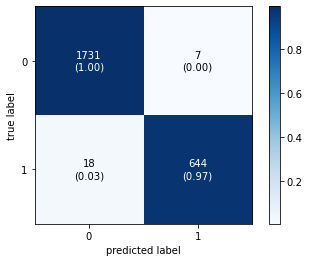

In [29]:
cm_nn = confusion_matrix(y_train, nn_predict_train)
fig, ax = plot_confusion_matrix(conf_mat = cm_nn,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)
plt.show()

#### Printing the Accuracy Score

In [30]:
print ('Accuracy Score :',np.round(accuracy_score(y_train, nn_predict_train),2))


Accuracy Score : 0.99


#### Diplay Classification report as Data Frame

In [31]:
# Print the results
clf_report = classification_report(y_train, nn_predict_train, output_dict = True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.989708,0.995972,0.992831,1738.000000
1,0.989247,0.972810,0.980960,662.000000
accuracy,0.989583,0.989583,0.989583,0.989583
macro avg,0.989478,0.984391,0.986895,2400.000000
weighted avg,0.989581,0.989583,0.989556,2400.000000


To conclude: It is a decent model by looking at precision, recall, and f1-score.

#### NN testing data results 

In [32]:
# Create confusion matrix
cm_nn = confusion_matrix(y_test, nn_predict_test)

# Creat confusion matrix to a dataframe
cm_df_nn = pd.DataFrame(cm_nn, columns = ['Stay', 'Leave'], index = ['Stay', 'Leave'])

# Display dataframe
cm_df_nn

,Stay,Leave
Stay,423,14
Leave,13,150


#### Plot Confusion Matrix

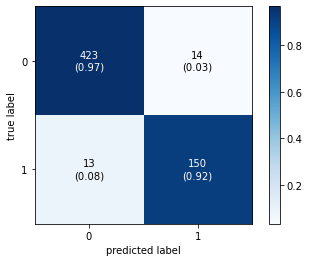

In [33]:
cm_nn = confusion_matrix(y_test, nn_predict_test)
fig, ax = plot_confusion_matrix(conf_mat = cm_nn,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)
plt.show()

#### Printing the Accuracy Score

In [34]:
print ('Accuracy Score :',np.round(accuracy_score(y_test, nn_predict_test),2)) 

Accuracy Score : 0.96


#### Diplay Classification report as Data Frame

In [35]:
# Print the results
clf_report = classification_report(y_test, nn_predict_test, output_dict = True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.970183,0.967963,0.969072,437.000
1,0.914634,0.920245,0.917431,163.000
accuracy,0.955000,0.955000,0.955000,0.955
macro avg,0.942409,0.944104,0.943252,600.000
weighted avg,0.955093,0.955000,0.955043,600.000


To conclude: It is a decent model by looking at precision, recall, and f1-score.

### Support Vector Mechine Model

In [36]:
svc_model = SVC()
svc_model.fit(x_train, np.ravel(y_train))

svc_perdict_train = svc_model.predict(x_train)
svc_perdict_test = svc_model.predict(x_test)

#### SVC training data results

In [37]:
# Create confusion matrix
cm_svc = confusion_matrix(y_train, svc_perdict_train)

# Creat confusion matrix to a dataframe
cm_df_svc = pd.DataFrame(cm_svc, columns = ['Stay', 'Leave'], index = ['Stay', 'Leave'])

# Display dataframe
cm_df_svc

,Stay,Leave
Stay,1677,61
Leave,201,461


#### Plot Confusion Matrix

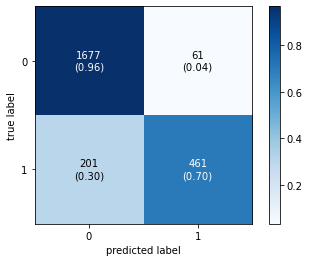

In [38]:
cm_svc = confusion_matrix(y_train, svc_perdict_train)
fig, ax = plot_confusion_matrix(conf_mat = cm_svc,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)
plt.show()

#### Printing the Accuracy Score

In [39]:
print ('Accuracy Score :',np.round(accuracy_score(y_train, svc_perdict_train),2)) 

Accuracy Score : 0.89


#### Diplay Classification report as Data Frame

In [40]:
clf_report = classification_report(y_train, svc_perdict_train, output_dict = True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.892971,0.964902,0.927544,1738.000000
1,0.883142,0.696375,0.778716,662.000000
accuracy,0.890833,0.890833,0.890833,0.890833
macro avg,0.888057,0.830638,0.853130,2400.000000
weighted avg,0.890260,0.890833,0.886493,2400.000000


To conclude: It is a decent model by looking at precision, recall, and f1-score.

### Random Forest Model

In [41]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)

# Train the classifier
clf.fit(x_train, np.ravel(y_train))
# print the name and gini importance of each feature
for feature in zip(features, clf.feature_importances_):
    print(feature)

('comp0', 0.12826206920932323)
('comp1', 0.17902762017776488)
('comp2', 0.08113944169901235)
('comp3', 0.051180478308808466)
('comp4', 0.05125473931699064)
('comp5', 0.03711870173365386)
('comp6', 0.06265378020147913)
('comp7', 0.03849909035231473)
('comp8', 0.04314440842972398)
('comp9', 0.0356902932058592)
('comp10', 0.043166040880911874)
('comp11', 0.03523993648753955)
('comp12', 0.030256982659626692)
('comp13', 0.05019029768690433)
('comp14', 0.03599596485049303)
('comp15', 0.03298906554055838)
('comp16', 0.03471685347104076)
('comp17', 0.029474235787995056)


In [42]:
# Create a selector object that will use the random forst classifier to identify
# Features the have an importance of more than 0.10
sfm = SelectFromModel(clf, threshold = 0.10)

#Train the selector
sfm.fit(x_train, np.ravel(y_train))

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.1)

In [43]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices = True):
    print(features[feature_list_index])

comp0
comp1


In [44]:
# Transformthe data to create a new dataset containing only the most important features
# Note: We have to allpy the transform to both the training x and testx data
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [45]:
# Create a new random forst classifier for the most important features
clf_important = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)

# Train the new classifier on the new data set containing the most important features
clf_important.fit(x_important_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [46]:
# Apply the full Featured classifier to the test data
rf_predict_train = clf.predict(x_train)
rf_predict_test = clf.predict(x_test)

#### RF training data results

In [47]:
# Create confusion matrix
cm_rf = confusion_matrix(y_train, rf_predict_train)

# Creat confusion matrix to a dataframe
cm_df_rf = pd.DataFrame(cm_rf, columns = ['Stay', 'Leave'], index = ['Stay', 'Leave'])

# Display dataframe
cm_df_rf

,Stay,Leave
Stay,1738,0
Leave,0,662


#### Plot Confusion Matrix

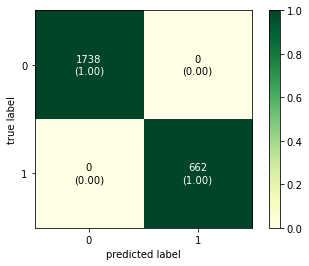

In [48]:
cm_rf = confusion_matrix(y_train, rf_predict_train)
fig, ax = plot_confusion_matrix(conf_mat = cm_rf,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True,
                                cmap="YlGn")
plt.show()

#### Printing the Accuracy Score

In [49]:
# printing the results 
print ('Accuracy Score :',np.round(accuracy_score(y_train, rf_predict_train),2)) 

Accuracy Score : 1.0


#### Diplay Classification report as Data Frame

In [50]:
clf_report = classification_report(y_train, rf_predict_train, output_dict = True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1738.0
1,1.0,1.0,1.0,662.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2400.0
weighted avg,1.0,1.0,1.0,2400.0


To conclude: It is a decent model by looking at precision, recall, and f1-score.

#### RF testing data results

In [51]:
# Create confusion matrix
cm_rf = confusion_matrix(y_test, rf_predict_test)

# Creat confusion matrix to a dataframe
cm_df_rf = pd.DataFrame(cm_rf, columns = ['Stay', 'Leave'], index = ['Stay', 'Leave'])

# Display dataframe
cm_df_rf

,Stay,Leave
Stay,408,29
Leave,53,110


#### Plot Confusion Matrix

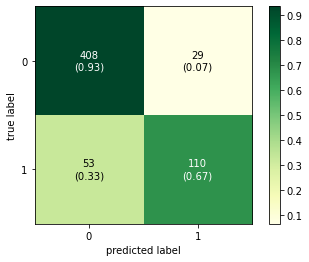

In [52]:
cm_rf = confusion_matrix(y_test, rf_predict_test)
fig, ax = plot_confusion_matrix(conf_mat = cm_rf,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True,
                                cmap="YlGn")
plt.show()

#### Printing the Accuracy Score

In [53]:
# printing the results 
print ('Accuracy Score :',np.round(accuracy_score(y_test, rf_predict_test),2)) 

Accuracy Score : 0.86


#### Diplay Classification report as Data Frame

In [54]:
clf_report = classification_report(y_test, rf_predict_test, output_dict = True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report

,precision,recall,f1-score,support
0,0.885033,0.933638,0.908686,437.000000
1,0.791367,0.674847,0.728477,163.000000
accuracy,0.863333,0.863333,0.863333,0.863333
macro avg,0.838200,0.804243,0.818581,600.000000
weighted avg,0.859587,0.863333,0.859729,600.000000


To conclude: It is a decent model by looking at precision, recall, and f1-score.

Questions / Answer

Q1: Comparing your results to that of a blind guess, explain why you think the results differed?

Ans: In the blind guess, the model is not trained on any other kind of data. This is a random prediction; there is no statistical calculation involved behind the answer. Therefore, the results differ after training the model. Because before training the model, it hasn’t suggested anything from the data. But after training the model, I learned the weights and now can perform better on retained data.

Q2: Describe how you would improve your project if you had more time?

Ans: I would apply some advanced statistical techniques for removing outliers and assigning more weights to the minority classes. Also, I would like to do fine-tuning by using a pre-trained deep learning model. I would apply more data cleaning techniques to clean out some redundant values.